In [2]:
!pip3 install tensorflow opencv-python matplotlib

In [3]:
!pip3 install numpy pandas 

In [4]:
!pip3 install scikit-learn

In [5]:
!pip3 install keras

In [6]:
!pip3 list

Package                      Version
---------------------------- ---------------
absl-py                      1.4.0
annotated-types              0.6.0
anyio                        4.3.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.7.0
blis                         0.7.11
CacheControl                 0.14.0
cachetools                   5.3.0
catalogue                    2.0.10
certifi                      2022.12.7
cffi                         1.16.0
charset-normalizer           3.0.1
classification-models-3D     1.0.10
click                        8.1.7
cloudpathlib                 0.16.0
colorama                     0.4.6
comm                        

In [7]:
import os,sys
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [8]:
os.listdir('data')

['healthy', 'infected']

In [9]:
"""
cpus=tf.config.experimental.list_physical_devices('CPU')
cpus
for cpu in cpus:
    tf.config.experimental.set_memory_growth(cpu,True)
"""

"\ncpus=tf.config.experimental.list_physical_devices('CPU')\ncpus\nfor cpu in cpus:\n    tf.config.experimental.set_memory_growth(cpu,True)\n"

In [10]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 2152 files belonging to 2 classes.


In [11]:
data=data.map(lambda x,y:(x/255,y))
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
print(batch[0].min(),batch[0].max())


0.0 1.0


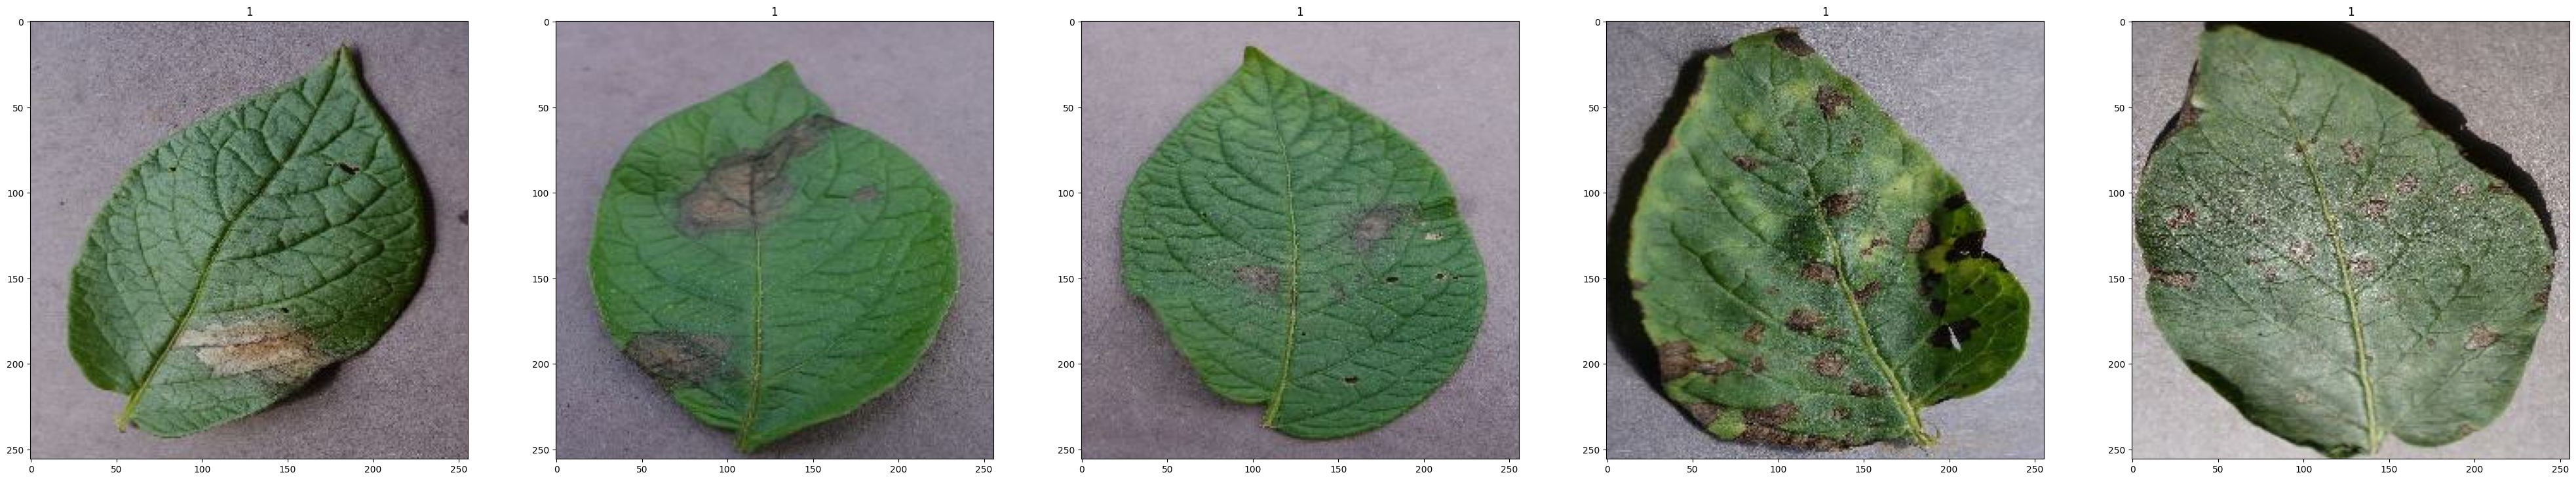

In [13]:
fix,ax=plt.subplots(ncols=5,figsize=(50,50))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data_size=len(data)
train_size=int(data_size*.7)
val_size=int(data_size*.2)+1
test_size=int(data_size*.1)+1

In [15]:
print(data_size)
print(train_size,val_size,test_size)
print(train_size+val_size+test_size)

68
47 14 7
68


In [16]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16,(3,3), 1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1,activation='relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [21]:
logdir='logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist = model.fit(train,epochs=5,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/5
47/47 [==============================] - 46s 942ms/step - loss: 0.2928 - accuracy: 0.9182 - val_loss: 0.2618 - val_accuracy: 0.9241
Epoch 2/5
47/47 [==============================] - 38s 808ms/step - loss: 0.1732 - accuracy: 0.9342 - val_loss: 0.1296 - val_accuracy: 0.9598
Epoch 3/5
47/47 [==============================] - 41s 874ms/step - loss: 0.1540 - accuracy: 0.9455 - val_loss: 0.1770 - val_accuracy: 0.9129
Epoch 4/5
47/47 [==============================] - 41s 876ms/step - loss: 0.0861 - accuracy: 0.9654 - val_loss: 0.1148 - val_accuracy: 0.9509
Epoch 5/5
47/47 [==============================] - 42s 886ms/step - loss: 0.0906 - accuracy: 0.9721 - val_loss: 0.0685 - val_accuracy: 0.9799


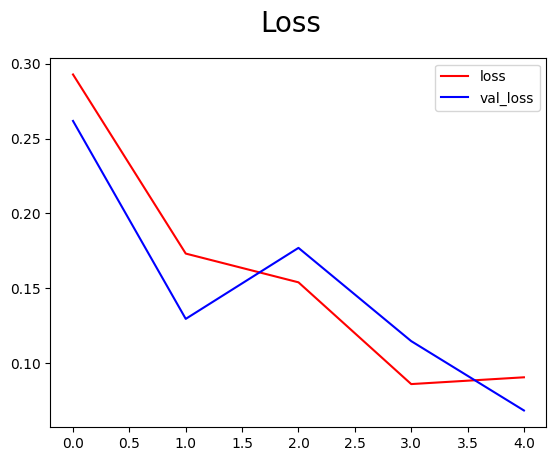

In [23]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='blue',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator():
    x,y=batch
    res=model.predict(x)
    pre.update_state(y,res)
    re.update_state(y,res)
    acc.update_state(y,res)


1/1 [==============================] - 0s 136ms/step


In [27]:
print(f'precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

precision:0.989130437374115, Recall:1.0, Accuracy:0.9900000095367432


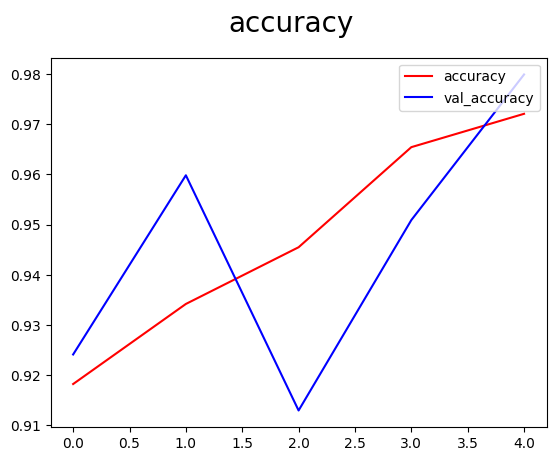

In [28]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [29]:
import cv2

In [30]:
img = cv2.imread('healthy_test2.jpg')

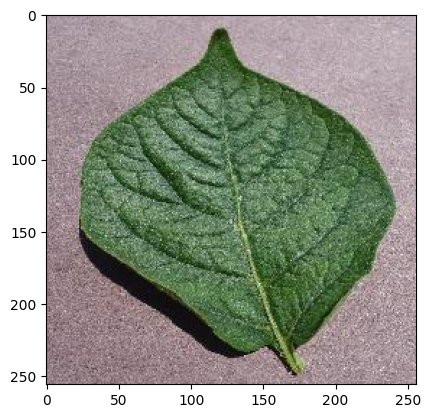

In [31]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

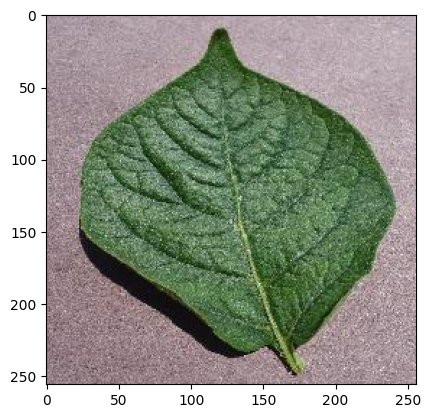

In [32]:
resize= tf.image.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
res = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [34]:
res

array([[0.14253624]], dtype=float32)

In [36]:
model.save("model.keras")